# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

# Reading Dataset

In [2]:
df = pd.read_csv(r'../input/sms-spam-collection-dataset/spam.csv', encoding = 'latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


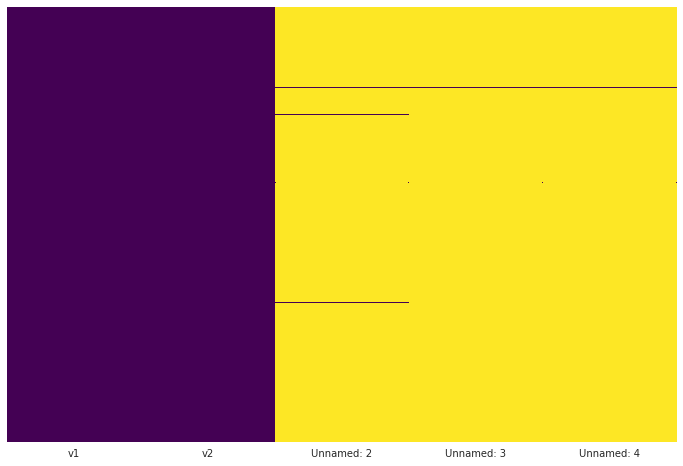

In [3]:
#Find Missing Values
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cmap = 'viridis', yticklabels = False, cbar = False)

In [4]:
df.dropna(how="any", inplace=True, axis=1)
df.columns = ['label', 'message']
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Exploratory Data Analysis

In [5]:
df.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
df.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

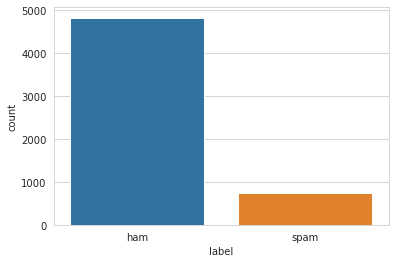

In [7]:
sns.countplot(df['label'])

It is an Imbalaanced Dataset, so f1_score will be the best metric for evaluation

In [8]:
# convert label to a numerical variable
df['label_num'] = df.label.map({'ham':0, 'spam':1})
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


## Visualizing Most Repeated Words using WordCloud

In [9]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
def word_cloud(data, title=None):
    cloud = WordCloud(background_color = 'black',
                     stopwords = stopwords,
                     max_words = 200,
                     max_font_size = 40,
                     scale = 3).generate(str(data))
    fig = plt.figure(figsize=(15,15))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.25)
        plt.imshow(cloud)
        plt.show()

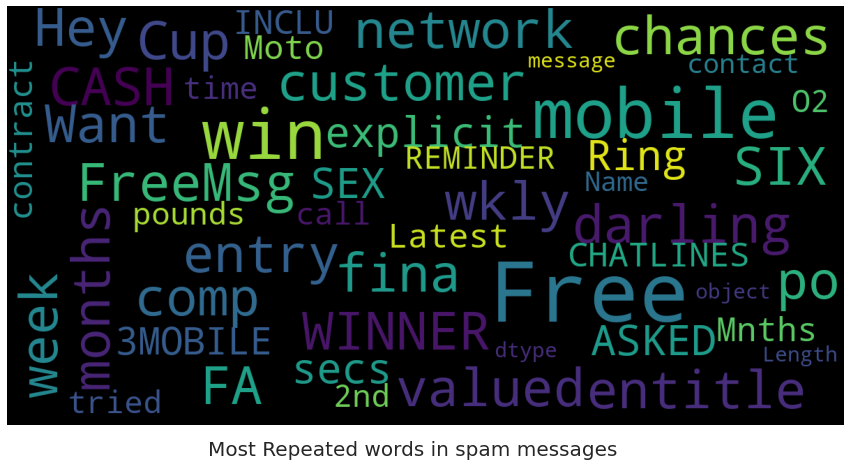

In [10]:
word_cloud(df[df['label_num']==1]['message'],'Most Repeated words in spam messages')

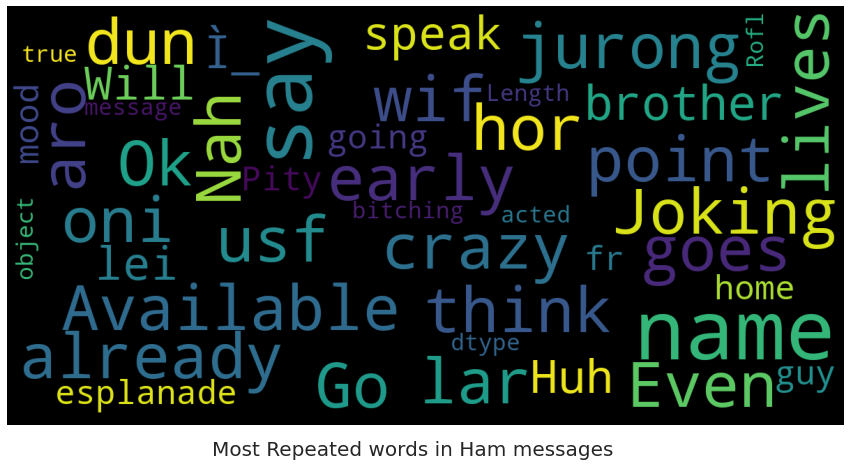

In [11]:
word_cloud(df[df['label_num']==0]['message'],'Most Repeated words in Ham messages')

## Number of characters in a sms

Text(0.5, 0.98, 'Characters in sms')

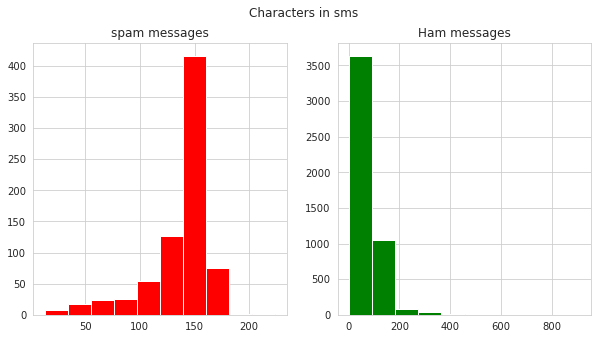

In [12]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
sms_len=df[df['label_num']==1]['message'].str.len()
ax1.hist(sms_len,color='red')
ax1.set_title('spam messages')
sms_len=df[df['label_num']==0]['message'].str.len()
ax2.hist(sms_len,color='green')
ax2.set_title('Ham messages')
fig.suptitle('Characters in sms')

Through just basic EDA we've been able to discover a trend that spam messages tend to have more characters.

Text(0.5, 0.98, 'Words in a Sms')

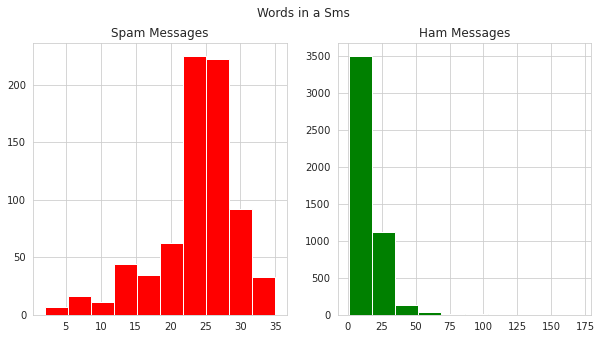

In [13]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
sms_words = df[df['label_num']==1]['message'].str.split().map(lambda x: len(x))
ax1.hist(sms_words, color='red')
ax1.set_title('Spam Messages')
sms_words = df[df['label_num']==0]['message'].str.split().map(lambda x: len(x))
ax2.hist(sms_words, color='green')
ax2.set_title('Ham Messages')
fig.suptitle('Words in a Sms')

In [14]:
df[df.label=='ham'].describe()

,label_num
count,4825.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


In [15]:
df[df.label=='spam'].describe()

,label_num
count,747.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [16]:
import string
from nltk.corpus import stopwords

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return ' '.join([word for word in nopunc.split() if word.lower() not in STOPWORDS])

In [17]:
df.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [18]:
df['clean_msg'] = df.message.apply(text_process)
df.head()

,label,message,label_num,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,Ok lar Joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,Free entry wkly comp win FA Cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,Nah think goes usf lives around though


In [19]:
X = df.clean_msg
y = df.label_num
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1, stratify = y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4179,)
(1393,)
(4179,)
(1393,)


# Model Building Using Pipelines

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [22]:
from sklearn.pipeline import Pipeline
pipeline_lr=Pipeline([('bow1', CountVectorizer(analyzer=text_process)),
                      ('tfidf1', TfidfTransformer()),
                     ('lr_classifier',LogisticRegression(random_state=0))])

In [23]:
pipeline_dt=Pipeline([('bow2', CountVectorizer(analyzer=text_process)),
                      ('tfidf2', TfidfTransformer()),
                     ('dt_classifier',DecisionTreeClassifier())])

In [24]:
pipeline_rf=Pipeline([('bow3', CountVectorizer(analyzer=text_process)),
                      ('tfidf3', TfidfTransformer()),
                     ('rf_classifier',RandomForestClassifier())])

In [25]:
pipeline_nb=Pipeline([('bow4', CountVectorizer(analyzer=text_process)),
                      ('tfidf4', TfidfTransformer()),
                     ('naive_classifier',MultinomialNB())])

In [26]:
pipeline_svm=Pipeline([('bow5', CountVectorizer(analyzer=text_process)),
                      ('tfidf5', TfidfTransformer()),
                     ('svm_classifier',SVC())])

In [27]:
## Lets make the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_rf, pipeline_nb, pipeline_svm]

In [28]:
best_score=0.0
best_classifier=0
best_pipeline=""

In [29]:
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Random Forest', 3: 'Naive-Baies Classifier', 4: 'SVM Classifier'}

# Fit the pipelines
for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [30]:
from sklearn.metrics import f1_score
for i,model in enumerate(pipelines):
    predictions = model.predict(X_test)
    score = f1_score(y_test, predictions, average='macro')
    print("{} Test F1_Score: {}".format(pipe_dict[i], score))

Logistic Regression Test F1_Score: 0.9459514434229694
Decision Tree Test F1_Score: 0.9167544051224046
Random Forest Test F1_Score: 0.9549128404309428
Naive-Baies Classifier Test F1_Score: 0.8930542383597526
SVM Classifier Test F1_Score: 0.9512236684843505


In [31]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_score:
        best_score=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best f1_score:{}'.format(pipe_dict[best_classifier]))

Classifier with best f1_score:Random Forest
